# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hougha

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

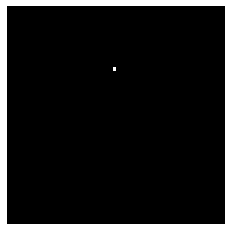

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os
import math

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')
plt.show()

3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

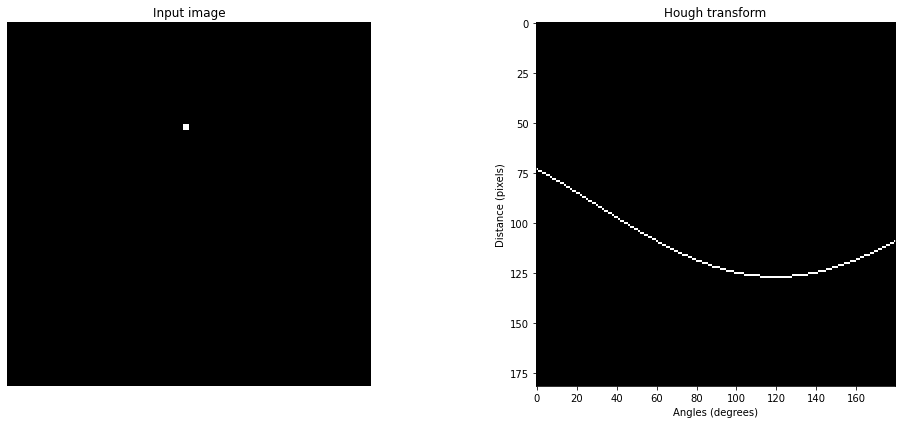

In [3]:
#3
from skimage.transform import hough_line
h, theta, rho = hough_line(im)
#4
show_hough(h,im)

In [4]:
#Komentarz
#Pojedynczy punkt w przestrzeni kartezjańskiej jest reprezentowany przez przebieg sinusoidalny w przestrzeni Hougha

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

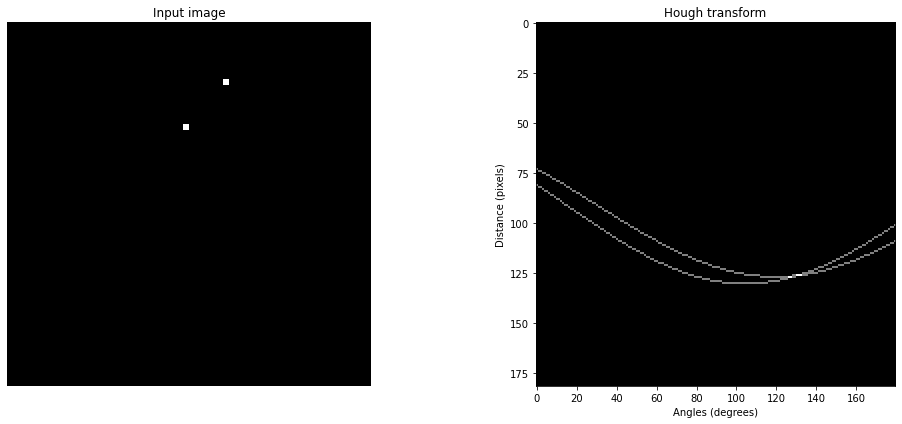

In [5]:
#5
im2 = np.zeros((64,64), dtype=np.uint8)
im2[18, 31] = 1
im2[10, 38] = 1
h2, theta2, rho2 = hough_line(im2)
show_hough(h2, im2)



In [6]:
#Za pomocą dwóch punktów w przestrzeni kartezjańskiej uzyskano dwa przebiegi sinusoidalne przechodzące przez jeden punkt

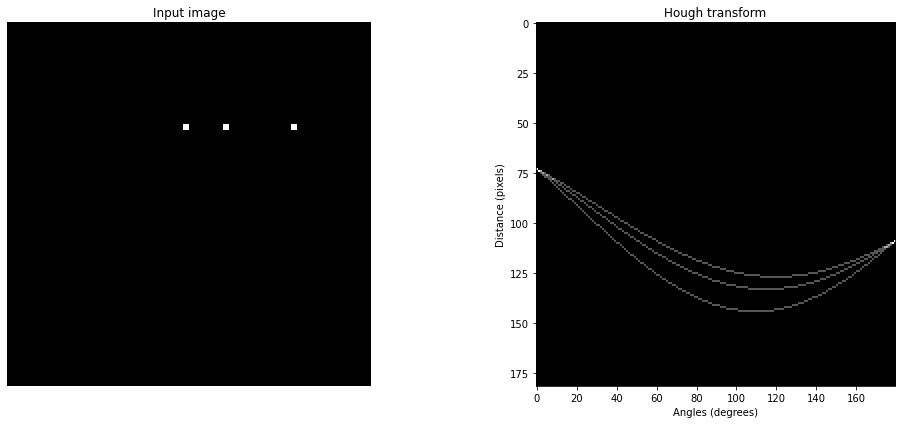

In [7]:
#6
im3 = np.zeros((64,64), dtype=np.uint8)
im3[18, 31] = 1
im3[18, 38] = 1
im3[18, 50] = 1
h3, theta3, rho3 = hough_line(im3)
show_hough(h3, im3)

In [8]:
#Komentarz
#Uzyskaliśmy przebiegi sinusoidalne o wspólnych węzłach. 
#Widzimy również, że punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują 
#z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

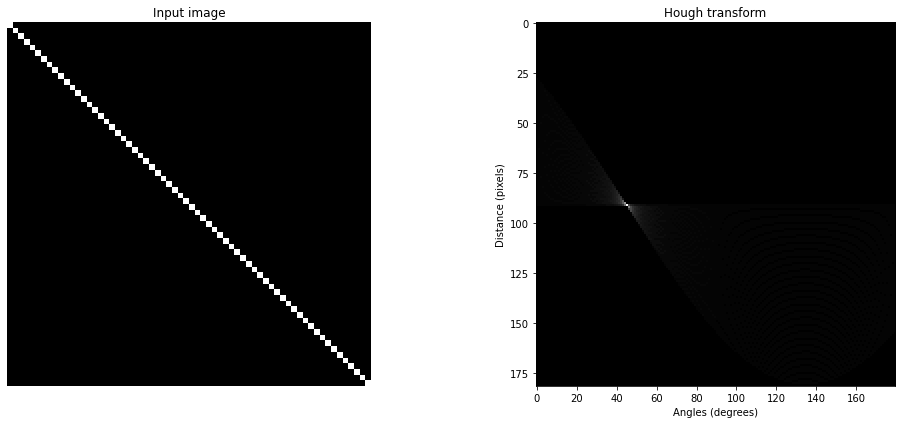

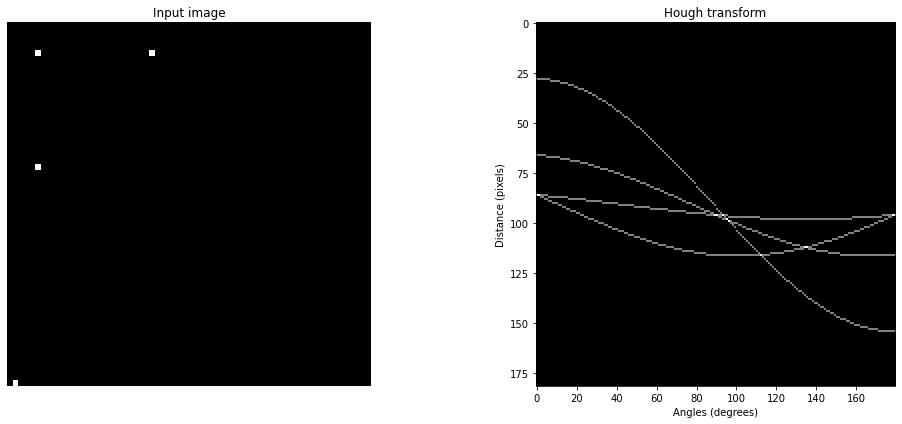

In [9]:
#7
im4 = np.zeros((64,64), dtype=np.uint8)
im4[:, :] = np.eye(64)
h4, theta4, rho4 = hough_line(im4)
show_hough(h4, im4,)

im5 = np.zeros((64,64), dtype=np.uint8)
im5[5, 5] = 1
im5[5, 25] = 1
im5[25, 5] = 1
im5[63, 1] = 1
h5, theta5, rho5 = hough_line(im5)
show_hough(h5, im5)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

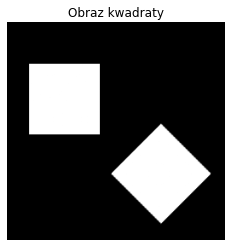

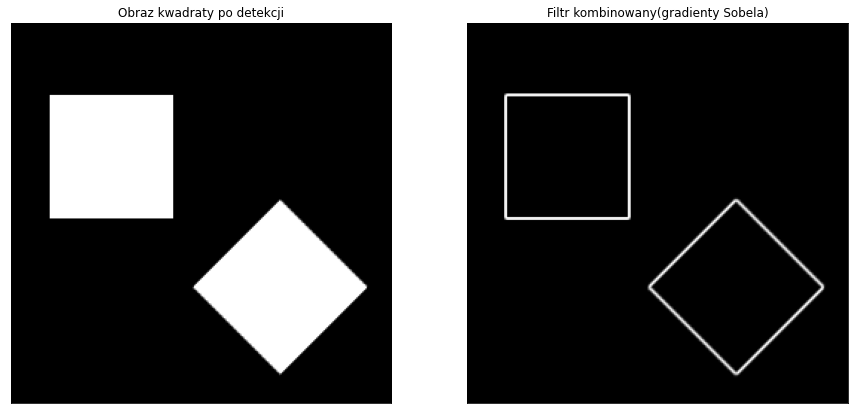

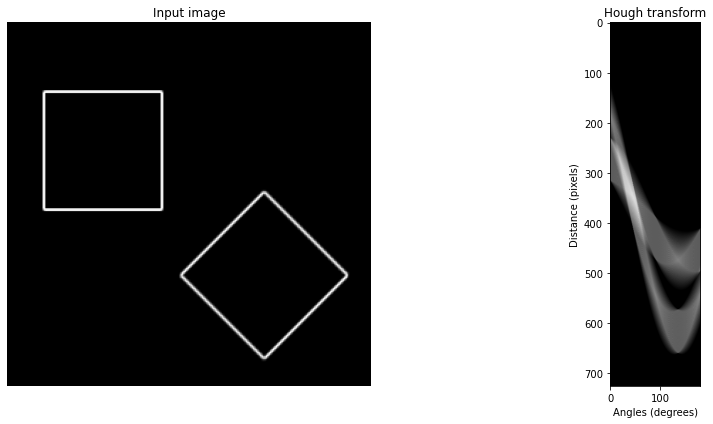

In [10]:
#1
kw = cv2.imread("kwadraty.png")
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)
kw = kw.astype(np.float32)
plt.plot,plt.imshow(kw, 'gray', vmin=0, vmax=256),plt.title('Obraz kwadraty')
plt.axis('off')

#2 Wykonanie operacji na gradiencie Sobela
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],np.float32)/9.0
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]],np.float32)/9.0

OS1 = cv2.filter2D(kw,-1, S1)
OS2 = cv2.filter2D(kw,-1, S2)

OS1_abs = np.abs(OS1)
OS2_abs = np.abs(OS2)

grad = np.sqrt(np.square(OS1_abs)+np.square(OS2_abs))

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15,7)
plt.subplot(121),plt.imshow(kw),plt.title('Obraz kwadraty po detekcji')
plt.xticks([]), plt.yticks([])
plt.gray()
plt.subplot(122),plt.imshow(grad),plt.title('Filtr kombinowany(gradienty Sobela)')
plt.xticks([]), plt.yticks([])
plt.gray()

#3
h, theta, rho = hough_line(grad)

show_hough(h, grad)

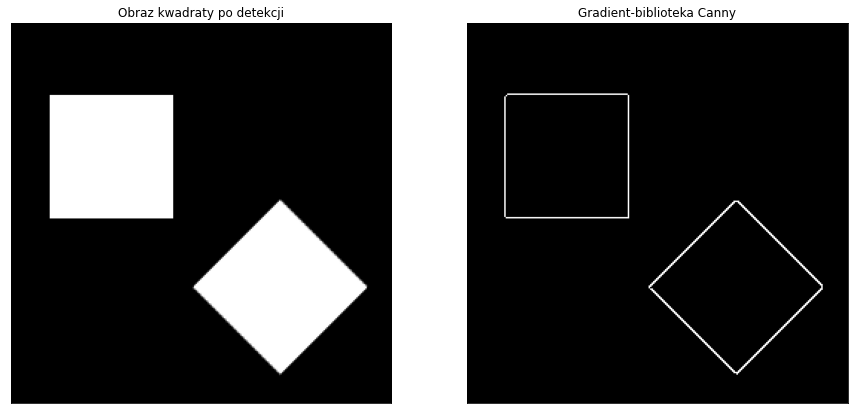

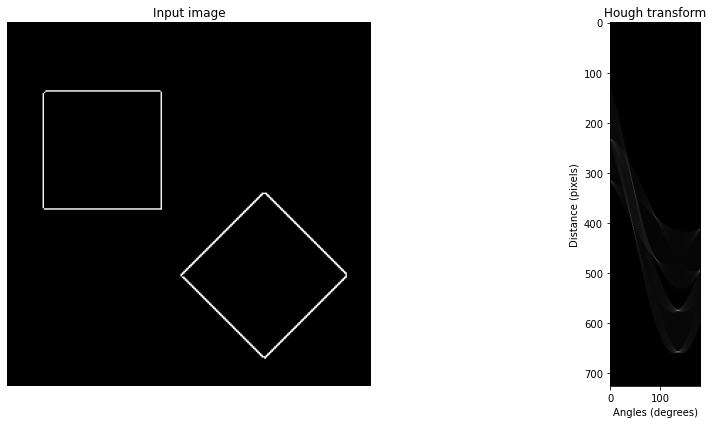

In [11]:
#1
kw = cv2.imread("kwadraty.png")

#2 Wykonanie detekcji dla gotowej funkcji z biblioteki Canny
kw_can=cv2.Canny(kw,5,10,None,3,1)
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15,7)
plt.subplot(121),plt.imshow(kw),plt.title('Obraz kwadraty po detekcji')
plt.xticks([]), plt.yticks([])
plt.gray()
plt.subplot(122),plt.imshow(kw_can),plt.title('Gradient-biblioteka Canny')
plt.xticks([]), plt.yticks([])
plt.gray()

#3
hough_kw = hough_line(kw_can)
show_hough(hough_kw[0], kw_can)

In [12]:
#Komentarz
#Nie jest widoczna liczba maksimów jakiej się spodziewaliśmy jednak po wyrysowaniu okręgów w okręślonych punktach jest ona
#widoczna.

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

In [13]:
hough_kw = hough_line(kw_can)
H, theta, rho  = hough_line_peaks(hough_kw[0],hough_kw[1],hough_kw[2])
print(theta)
print(rho)

[-0.78101046  1.57079633  1.57079633 -0.79856126  0.78101046 -0.0087754
  0.0087754   0.79856126]
[-37.55172414 131.68137931  48.56689655  40.55586207 212.79310345
 107.64827586  26.53655172 294.9062069 ]


Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha.

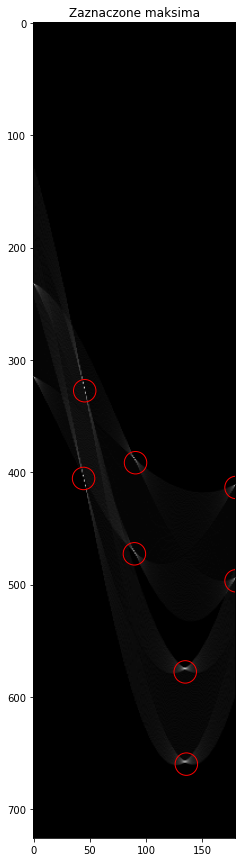

In [14]:
import math
theta = (theta*(180/math.pi))
theta =theta+90
rho=rho+365
circle = []

for y in range(len(theta)):
    circle.append(plt.Circle((theta[y], rho[y]), 10, color='r', fill=False))

fig,ax = plt.subplots(1,figsize=(20,15))
ax.set_aspect('equal')
ax.imshow(hough_kw[0], 'gray')
ax.set_title('Zaznaczone maksima')
for x in range(len(circle)):
    ax.add_patch(circle[x])    

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

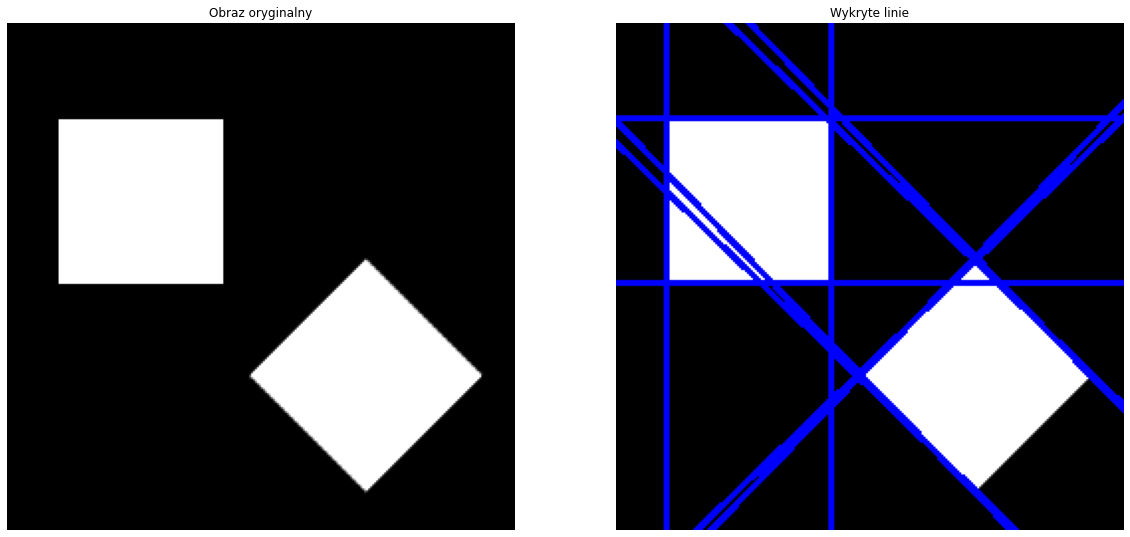

In [15]:
I_kwadrat = cv2.imread('kwadraty.png',cv2.IMREAD_GRAYSCALE)
kw = cv2.imread('kwadraty.png')
kw_gray = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)
krawedzie = cv2.Canny(kw_gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(krawedzie,1,np.pi/180,64)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(kw,(x1,y1),(x2,y2),(0,0,255),2)

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(I_kwadrat, 'gray')
ax[0].axis('off')
ax[0].set_title('Obraz oryginalny')
ax[1].imshow(kw, 'gray')
ax[1].axis('off')
ax[1].set_title("Wykryte linie")
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

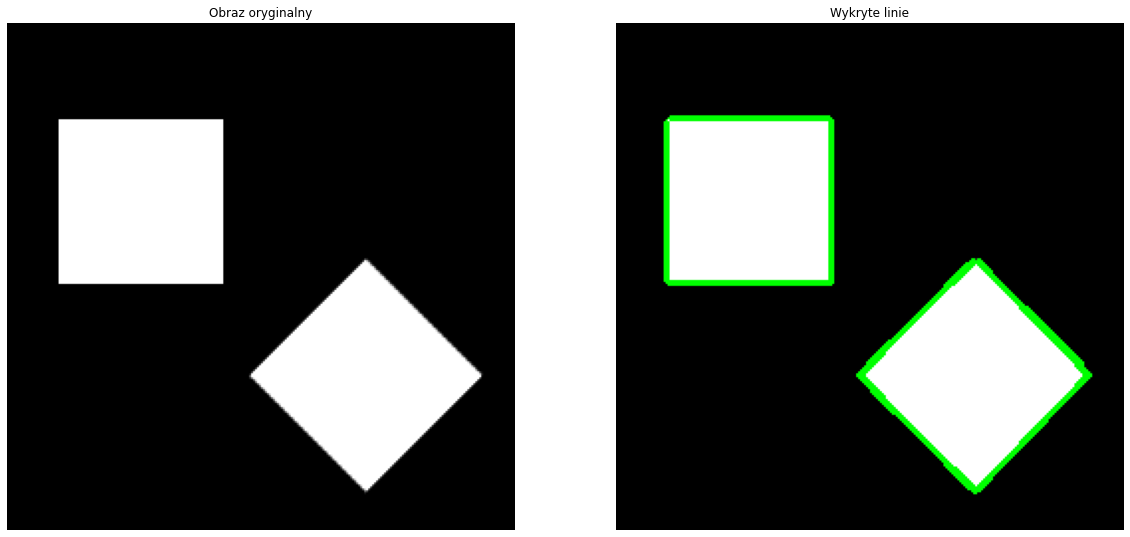

In [16]:
import cv2 
import numpy as np
kw_2 = cv2.imread("kwadraty.png")
krawedzie_2 = cv2.Canny(kw_2,50,150,apertureSize = 3)
lines_2 = cv2.HoughLinesP(krawedzie_2,1,np.pi/180,40,minLineLength=20,maxLineGap=10)

for line in lines_2:
    x1,y1,x2,y2 = line[0]
    cv2.line(kw_2,(x1,y1),(x2,y2),(0,255,0),2)

f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(I_kwadrat, 'gray')
ax[0].axis('off')
ax[0].set_title('Obraz oryginalny')
ax[1].imshow(kw_2, 'gray')
ax[1].axis('off')
ax[1].set_title("Wykryte linie")
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

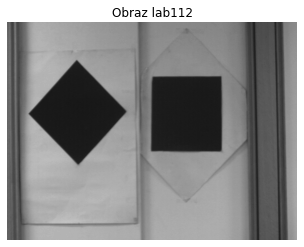

In [17]:
#1
lab = cv2.imread("lab112.png")
lab = cv2.cvtColor(lab, cv2.COLOR_BGR2GRAY)
plt.plot,plt.imshow(lab, 'gray', vmin=0, vmax=256),plt.title('Obraz lab112')
plt.axis('off')
plt.show()


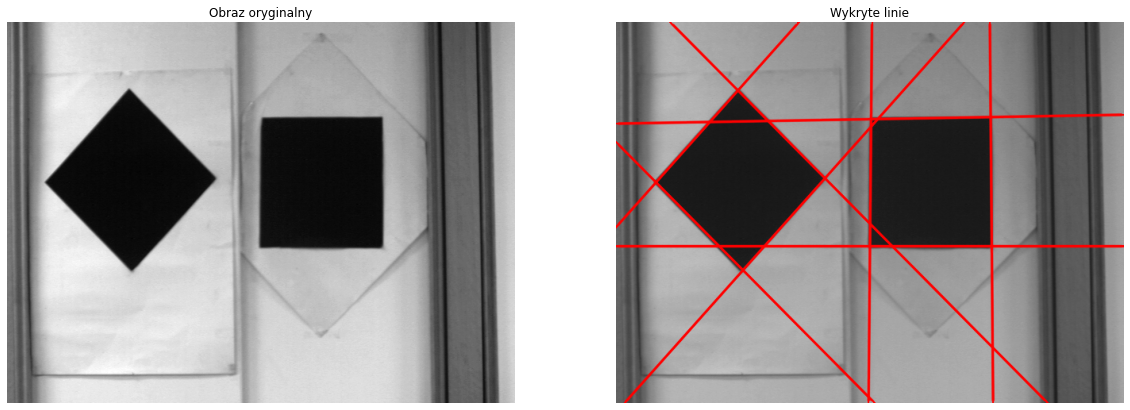

In [18]:
#2)
lab_1 = cv2.imread("lab112.png",cv2.IMREAD_GRAYSCALE)
I_lab_rgb = cv2.imread('lab112.png')

lab_1 = np.where(lab_1 > 40, 0, 255)
lab_1[:, 500:] = 0
lab_1 = lab_1.astype('uint8')

X,Y = lab_1.shape
lab_2 = np.zeros((X, Y, 3))
lab_2[:, :, 0] = lab_1
lab_2[:, :, 1] = lab_1
lab_2[:, :, 2] = lab_1
lab_2 = lab_2.astype('uint8')

krawedzie = cv2.Canny(lab_2, 50, 150, apertureSize = 3)

#3
lab3_H, lab3_theta, lab3_rho = hough_line(krawedzie)
lab4_H, lab4_theta, lab4_rho = hough_line_peaks(lab3_H, lab3_theta, lab3_rho)
theta2 = lab4_theta
rho2 = lab4_rho
wynik = cv2.cvtColor(lab_1, cv2.COLOR_GRAY2BGR)

# I_lab_rgb = cv2.imread('lab112.png')
# I_lab_rgb = cv2.cvtColor(I_lab_rgb, cv2.COLOR_BGR2RGB)

for i in range(0,len(theta2)):
    rho = rho2[i]
    theta = theta2[i]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
        
    pt1 = (x1, y1)
    pt2 = (x2, y2)
    cv2.line(I_lab_rgb, pt1, pt2, (255,0,0), 2, cv2.LINE_AA)

I_lab = cv2.imread("lab112.png",cv2.IMREAD_GRAYSCALE)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(I_lab, 'gray')
ax[0].axis('off')
ax[0].set_title('Obraz oryginalny')
ax[1].imshow(I_lab_rgb, 'gray')
ax[1].axis('off')
ax[1].set_title("Wykryte linie")
plt.show()

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

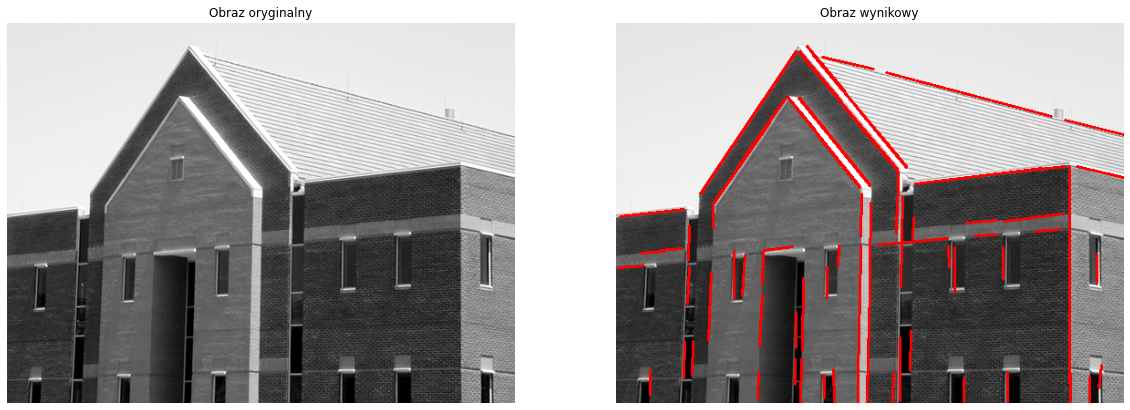

In [19]:
dom = cv2.imread("dom.png",cv2.IMREAD_GRAYSCALE)

dom_rgb = cv2.imread('dom.png')
dom = cv2.imread('dom.png',cv2.IMREAD_GRAYSCALE)
dom1 = cv2.GaussianBlur(dom, (15, 15), 0)
dom1 = cv2.GaussianBlur(dom1, (7, 7), 0)

dom_detekcja_canny = cv2.Canny(dom1, 10, 30, None, 3, 1)
linie_3 = cv2.HoughLinesP(dom_detekcja_canny, 1, np.pi/180, 20, minLineLength = 23, maxLineGap = 5)
for i in linie_3:
    x1, y1, x2, y2 = i[0]
    cv2.line(dom_rgb, (x1,y1), (x2,y2), (255,0,0), 2)
    
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(dom, 'gray')
ax[0].axis('off')
ax[0].set_title('Obraz oryginalny')
ax[1].imshow(dom_rgb, 'gray')
ax[1].axis('off')
ax[1].set_title('Obraz wynikowy')
plt.show()
